In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [2]:
def max_action(q1, q2, state):
    values = np.array([q1[state, a] + q2[state, a] for a in range(2)])
    action = np.argmax(values)
    return action

In [3]:
pole_theta_space = np.linspace(-0.20943951, 0.20943951, 10)
pole_theta_vel_space = np.linspace(-4, 4, 10)
cart_pos_space = np.linspace(-2.4, 2.4, 10)
cart_vel_space = np.linspace(-4, 4, 10)

In [4]:
def get_state(observation):
    cart_x, cart_x_dot, cart_theta, cart_theta_dot = observation
    cart_x = int(np.digitize(cart_x, cart_pos_space))
    cart_x_dot = int(np.digitize(cart_x_dot, cart_vel_space))
    cart_theta = int(np.digitize(cart_theta, pole_theta_space))
    cart_theta_dot = int(np.digitize(cart_theta_dot, pole_theta_vel_space))
    return (cart_x, cart_x_dot, cart_theta, cart_theta_dot)

In [5]:
def plot_running_average(totalrewards):
    N = len(totalrewards)
    running_avg = np.empty(N)
    for t in range(N):
       running_avg[t] = np.mean(totalrewards[max(0, t-100):(t+1)])
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

D:\apps\Anaconda3\envs\OpenAiGym\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


starting game  0
starting game  5000
starting game  10000
starting game  15000
starting game  20000
starting game  25000
starting game  30000
starting game  35000
starting game  40000
starting game  45000
starting game  50000
starting game  55000
starting game  60000
starting game  65000
starting game  70000
starting game  75000
starting game  80000
starting game  85000
starting game  90000
starting game  95000


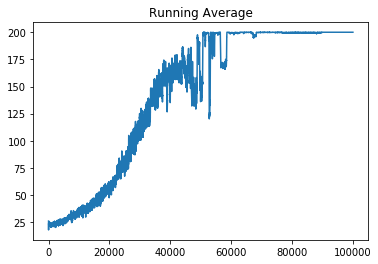

In [6]:
env = gym.make('CartPole-v0')
alpha = 0.1
gamma = 0.9
eps = 1.0

states = []
for i in range(len(cart_pos_space) + 1):
    for j in range(len(cart_vel_space) + 1):
        for k in range(len(pole_theta_space) + 1):
            for l in range(len(pole_theta_vel_space) + 1):
                states.append((i,j,k,l))
                
q1, q2 = {}, {}

for s in states:
    for a in range(2):
        q1[s, a] = 0
        q2[s, a] = 0
        
num_games = 100000
total_rewards = np.zeros(num_games)

for i in range(num_games):
    if i % 5000 == 0:
        print('starting game ', i)
    observation = env.reset()
    done = False
    ep_rewards = 0
    while not done:
        s = get_state(observation)
        rand = np.random.random()
        a = max_action(q1, q2, s) if rand < (1-eps) else env.action_space.sample()
        observation_, reward, done, info = env.step(a)
        ep_rewards += reward
        s_ = get_state(observation_)
        rand = np.random.random()
        if rand <= 0.5:
            a_ = max_action(q1, q1, s)
            q1[s, a] += alpha * (reward + gamma*q2[s_, a_] - q1[s,a])
        else:
            a_ = max_action(q2, q2, s)
            q2[s, a] += alpha * (reward + gamma*q1[s_, a_] - q2[s,a])
        observation = observation_
        
        
    eps -= 2/num_games if eps > 0 else 0
    total_rewards[i] = ep_rewards
 
plot_running_average(total_rewards)
    


    